<a href="https://colab.research.google.com/github/heysourin/GNN-Graph-Neural-Network/blob/main/Dataset%20examples/GNN_few_dataset_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python -c "import torch; print(torch.version.cuda)"

12.1


In [2]:
# PyTorch version
!python -c "import torch; print(torch.__version__)"

2.3.1+cu121


In [9]:
!pip install torch-geometric
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.3.1+cu121.html
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.3.1+cu121.html

Looking in links: https://data.pyg.org/whl/torch-2.3.1+cu121.html
  Using cached torch_sparse-0.6.18.tar.gz (209 kB)
  Preparing metadata (setup.py) ... done
ERROR: Operation cancelled by user
Looking in links: https://data.pyg.org/whl/torch-2.3.1+cu121.html
  Using cached torch_scatter-2.1.2.tar.gz (108 kB)
  Preparing metadata (setup.py) ... canceled
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 92, in resolve
    result = self._result = r

In [6]:
import torch
# from torch_geometric.data import Data

In [7]:
from torch_geometric.datasets import TUDataset
dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES')

Processing...
Done!


In [10]:
dataset

ENZYMES(600)

In [11]:
len(dataset)

600

In [12]:
dataset.num_classes

6

In [13]:
dataset.num_node_features

3

In [14]:
data = dataset[0]
data

Data(edge_index=[2, 168], x=[37, 3], y=[1])

In [15]:
from torch_geometric.utils import to_networkx
import networkx as nx

In [16]:
type(data)

torch_geometric.data.data.Data

In [17]:
networkX_graph = to_networkx(data)

In [18]:
type(networkX_graph)

networkx.classes.digraph.DiGraph

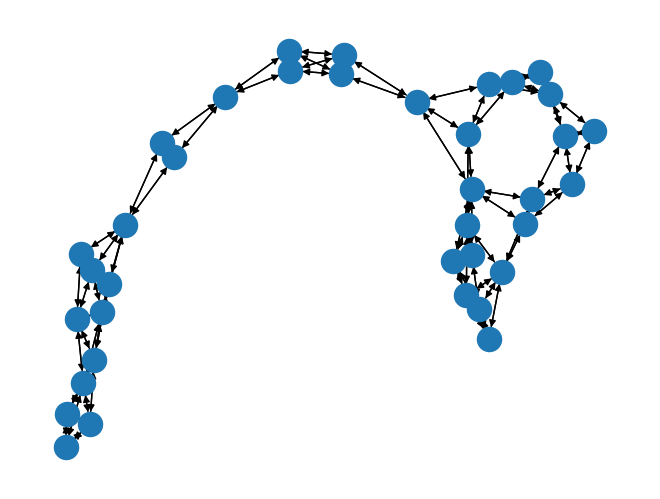

In [19]:
#plotting: Data(edge_index=[2, 168], x=[37, 3], y=[1])
nx.draw(networkX_graph)

---
## **Cora Dataset:**

In [20]:
from torch_geometric.datasets import Planetoid
cora_dataset = Planetoid(root='/tmp/Cora', name='Cora')

Processing...
Done!


In [21]:
cora_dataset

Cora()

In [22]:
len(cora_dataset)

1

In [23]:
print(cora_dataset.num_classes)
print(cora_dataset.num_features)
print(cora_dataset.num_node_features) #Features each node has

7
1433
1433


In [24]:
c_ds = cora_dataset[0]
c_ds #0th index(the only index here) data has 2708 nodes(each of 1433 features), conneted by 10556 edges
      # data mode: single, as it has only one mess of nodes

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [25]:
# check training nodes:
print("Num of train nodes:", c_ds.train_mask.sum().item())
# check test nodes:
print("Num of test nodes:" , c_ds.test_mask.sum().item())
# check validation nodes:
print("Num of validation nodes:", c_ds.val_mask.sum().item() )

Num of train nodes: 140
Num of test nodes: 1000
Num of validation nodes: 500


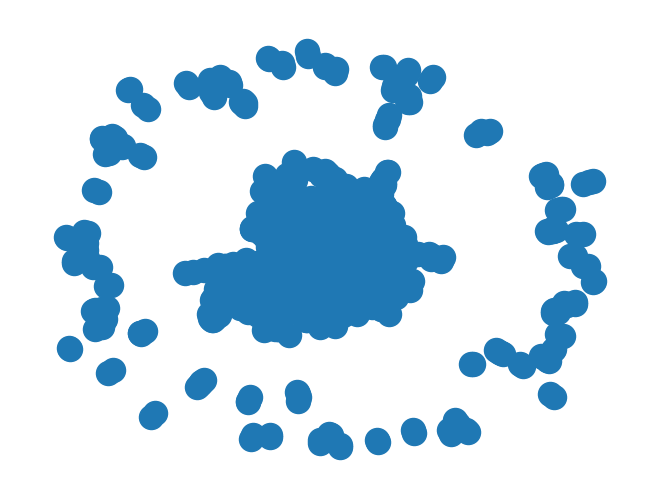

In [26]:
networkx_graph = to_networkx(c_ds)
nx.draw(networkx_graph)

In [27]:
networkx_graph

In [28]:
print(nx.is_weighted(networkx_graph))
print(nx.is_directed(networkx_graph))
print(networkx_graph.order())
print(networkx_graph.number_of_edges())
print(networkx_graph.number_of_nodes())
print(networkx_graph.nodes)
print(networkx_graph.edges)

False
True
2708
10556
2708
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 21

In [30]:
c_ds.x.shape

torch.Size([2708, 1433])

In [31]:
nx.write_gexf(networkX_graph, 'cora_ex.gexf')

In [32]:
nx.write_graphml(networkX_graph, 'cora_ex.graphml')

---
## **Cora dataset from NetworkX:**

In [34]:
!tar -xvf /content/cora.tgz

cora/
cora/README
cora/cora.cites
cora/cora.content


In [35]:
import os
import networkx as nx
import pandas as pd
data_dir = os.path.expanduser("/content/cora")

In [36]:
edgelist = pd.read_csv(os.path.join(data_dir, "cora.cites"), sep='\t', header=None, names=["target", "source"])
edgelist["label"] = "cites"

In [37]:
edgelist.sample(frac=1).head(10)

,target,source,label
2917,36140,105057,cites
2706,31336,1129442,cites
3038,39890,149669,cites
4226,141160,1131345,cites
2297,20601,25805,cites
671,2665,751408,cites
1151,5966,1106388,cites
4126,127940,243274,cites
4198,137130,23070,cites
2716,31353,1129608,cites


In [38]:
type(edgelist)

pandas.core.frame.DataFrame

In [39]:
Gnx = nx.from_pandas_edgelist(edgelist, edge_attr="label")
nx.set_node_attributes(Gnx, "paper", "label")

In [40]:
print(nx.is_weighted(Gnx))
print(nx.is_directed(Gnx))
print(Gnx.order())
print(Gnx.number_of_edges())
print(Gnx.number_of_nodes())
print(Gnx.edges)
print(Gnx.nodes)

False
False
2708
5278
2708
[(1033, 35), (1033, 1034), (1033, 1107062), (1033, 41714), (1033, 45605), (35, 103482), (35, 103515), (35, 1050679), (35, 1103960), (35, 1103985), (35, 1109199), (35, 1112911), (35, 1113438), (35, 1113831), (35, 1114331), (35, 1117476), (35, 1119505), (35, 1119708), (35, 1120431), (35, 1123756), (35, 1125386), (35, 1127430), (35, 1127913), (35, 1128204), (35, 1128227), (35, 1128314), (35, 1128453), (35, 1128945), (35, 1128959), (35, 1128985), (35, 1129018), (35, 1129027), (35, 1129573), (35, 1129683), (35, 1129778), (35, 1130847), (35, 1130856), (35, 1131116), (35, 1131360), (35, 1131557), (35, 1131752), (35, 1133196), (35, 1133338), (35, 1136814), (35, 1137466), (35, 1152421), (35, 1152508), (35, 1153065), (35, 1153280), (35, 1153577), (35, 1153853), (35, 1153943), (35, 1154176), (35, 1154459), (35, 116552), (35, 12576), (35, 128540), (35, 132806), (35, 135130), (35, 141342), (35, 141347), (35, 148170), (35, 15670), (35, 1688), (35, 175291), (35, 178727), (3

In [41]:
Gnx

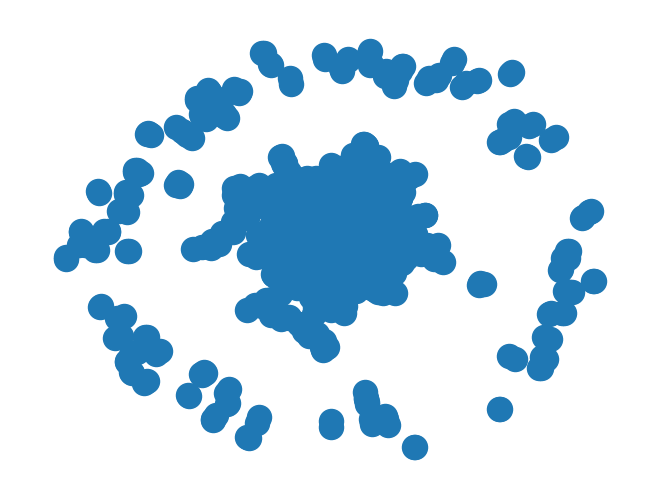

In [42]:
nx.draw(Gnx)

In [43]:
Gnx.number_of_nodes()

2708

In [44]:
Gnx.nodes

NodeView((1033, 35, 103482, 103515, 1050679, 1103960, 1103985, 1109199, 1112911, 1113438, 1113831, 1114331, 1117476, 1119505, 1119708, 1120431, 1123756, 1125386, 1127430, 1127913, 1128204, 1128227, 1128314, 1128453, 1128945, 1128959, 1128985, 1129018, 1129027, 1129573, 1129683, 1129778, 1130847, 1130856, 1131116, 1131360, 1131557, 1131752, 1133196, 1133338, 1136814, 1137466, 1152421, 1152508, 1153065, 1153280, 1153577, 1153853, 1153943, 1154176, 1154459, 116552, 12576, 128540, 132806, 135130, 141342, 141347, 148170, 15670, 1688, 175291, 178727, 18582, 190697, 190706, 1956, 197054, 198443, 198653, 206371, 210871, 229635, 231249, 248425, 249421, 254923, 259701, 259702, 263279, 263498, 265203, 273152, 27510, 28290, 286500, 287787, 28851, 289779, 289780, 289781, 307015, 335733, 33904, 33907, 35061, 38205, 387795, 415693, 41714, 427606, 44368, 45599, 46079, 46431, 486840, 48766, 503883, 503893, 513189, 54129, 54131, 56119, 561238, 568857, 573964, 573978, 574009, 574264, 574462, 575077, 5752